<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:150%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>IMDB Sentiment Analysis</b></h3>
</div>

<CENTER><IMG SRC="https://www.kdnuggets.com/wp-content/uploads/mayo_sent_analysis_fastapi_transformers-0.jpg"></CENTER>

## What is Sentiment Analysis?

*NLP stands for Natural Language Processing which is the task of mining the text and find out meaningful insights like Sentiments, Named Entity, Topics of Discussion and even Summary of the text.
Sentiment analysis is a natural language processing technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.*

## About Dataset

*IMDB dataset have 50K movie reviews for natural language processing or Text analytics. 
This is a dataset for binary sentiment classification. 
We have to built NLP model for So Sentiment Analysis which can predict the number of positive and negative reviews using either classification or deep learning algorithms.*

### Import Lib

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import re

### Download nltk pckgs

In [3]:
# download some library which hold in nltk only first time
nltk.download('punkt') #punctuation
nltk.download('wordnet')#for lemmatization
nltk.download('stopwords')#for stopwords corpus
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:green;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Exploratory Data Analysis (EDA)</b></h3>
</div>

In [4]:
df=pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df.shape

(50000, 2)

In [6]:
#check for null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
#check for duplicated values
df.duplicated().sum()

418

In [8]:
#drop duplicates
df.drop_duplicates(inplace=True)
df=df.reset_index()

In [9]:
df.drop("index",axis=1,inplace=True)

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

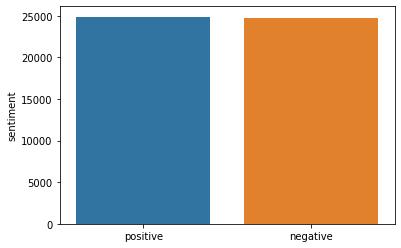

In [12]:
sns.barplot(x=df['sentiment'].value_counts().index,y=df['sentiment'].value_counts(),data=df)
plt.show()

#### As Data set is complete balance 

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:green;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Text Cleaning</b></h3>
</div>

### 1. Major Cleaning 

* Remove URLS
* Remove HTMLS tags
* Remove numbers
* Remove emails
* Remove emoi

In [13]:
#remove URLS 
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

#remove HTMLS tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

#remove numbers
def remove_numbers(text):
    removed_numbers = text.replace(r'\d+','')
    return removed_numbers

#remove emails 
def remove_emails(text):
    no_emails = text.replace(r"\S*@\S*\s?",'')
    return no_emails

#remove emoi
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#apply decontraction
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"did\'t", " did not", text)
    text = re.sub(r"would\'t", " would not", text)
    text = re.sub(r"ain\'t", " are not", text)
    text = re.sub(r"does\'t", " does not", text)
    text = re.sub(r"havn\'t", " have not", text)
    text = re.sub(r"is\'t", " is not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"wasn\'t", " was not", text)
    text = re.sub(r" u ", " you ", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"   "," ",text)
    text = re.sub(r"  "," ",text)
    return text 

In [14]:
#Call Function
df['review'] = df['review'].apply(remove_urls)
df['review'] = df['review'].apply(remove_html)
df['review'] = df['review'].apply(remove_numbers)
df['review'] = df['review'].apply(remove_emails)
df['review'] = df['review'].apply(remove_emoji)
df['review'] = df['review'].apply(decontraction)

In [15]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there is a family where a little boy...,negative
4,"Petter Mattei is ""Love in the Time of Money"" i...",positive
...,...,...
49577,I thought this movie did a down right good job...,positive
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49579,I am a Catholic taught in parochial elementary...,negative
49580,I am going to have to disagree with the previo...,negative


In [16]:
#2. Total No of Words
df['num_words']=df['review'].apply(lambda x: len(str(x).split()))

In [17]:
df

,review,sentiment,num_words
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. The filming tec...,positive,158
2,I thought this was a wonderful way to spend ti...,positive,165
3,Basically there is a family where a little boy...,negative,135
4,"Petter Mattei is ""Love in the Time of Money"" i...",positive,225
...,...,...,...
49577,I thought this movie did a down right good job...,positive,197
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,108
49579,I am a Catholic taught in parochial elementary...,negative,232
49580,I am going to have to disagree with the previo...,negative,217


### 2. Fine Cleaning 

* Convert text into Lower case
* Word_tokenize
* Remove punctuation and Stopwords
* Remove Specials Characters
* Lamatization
* Return text

In [18]:
lst=['ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 'wouldn', "wouldn't",
'are not','could not','would not','did not','does not','did not','was not','wasnt','does not','had not','have not','is not','might not','must not','need not','shall not','was not','no so','had not','wont',"won't",'do not','is not','isnt',"isn't",'not','never','am not']

In [19]:
def clean_text(text):
    #1. convert text into lower case
    text=text.lower()
    
    #2. Replace All negative words by not  
    lst1=set(lst)
    for i in lst1:
        if i in text:
            text=text.replace(i,'not')
            text=re.sub(r'not\'t', 'not',text)
            text = re.sub(r"  "," ",text)
    
    #2.word_tokenize
    text=text.strip()
    text=word_tokenize(text)
    
    #3.remove negativity from stopwords
    sw=stopwords.words('english')
    unwanted_ele=set(lst)
    updated_sw = [ele for ele in sw if ele not in unwanted_ele]
    
    #3.remove punctuation and stopwords
    words=updated_sw+list(string.punctuation)+list(["would","could","should","will","have","had"])
    text=[word for word in text if word not in words]
    
    #4. use only spcl characters consider only alphbets
    text=[word for word in text if word.isalpha() ==True]
    
    #5. apply lamatization to covert all plurals into singular
    lemma=WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    #text=set(text)  #remove duplicates words
    
    #join text
    text=' '.join(text)
    
    return text

In [20]:
import string
#call function
df['review']=df['review'].apply(clean_text)

In [21]:
#2. Total No of Words
df['num_words_clean']=df['review'].apply(lambda x: len(str(x).split()))

In [22]:
df

,review,sentiment,num_words,num_words_clean
0,one reviewer mentioned watching oz episode hoo...,positive,307,165
1,wonderful little production filming technique ...,positive,158,83
2,thought wonderful way spend time hot summer we...,positive,165,82
3,basically family little boy jake think zombie ...,negative,135,60
4,petter mattei love time money visually stunnin...,positive,225,120
...,...,...,...,...
49577,thought movie right good job not creative orig...,positive,197,82
49578,bad plot bad dialogue bad acting idiotic direc...,negative,108,52
49579,catholic taught parochial elementary school nu...,negative,232,114
49580,going disagree previous comment side maltin on...,negative,217,112


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:green;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Data Visualization</b></h3>
</div>

### Avg Text Size for Positive and Negative Reviews

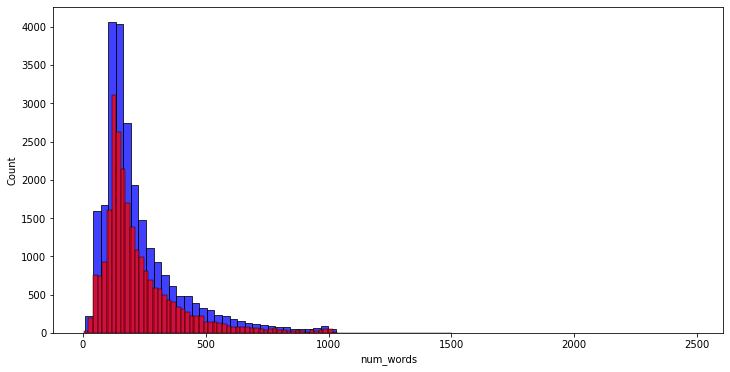

In [23]:
#Hist Plot for Spam and Not Spam
plt.figure(figsize=(12,6))
sns.histplot(df[df['sentiment']=='positive']['num_words'],color='blue',bins=80)
sns.histplot(df[df['sentiment']=='negative']['num_words'],color='red',bins=80)
plt.show()

### WordCloud - Positive Reviews

In [24]:
from wordcloud import WordCloud,STOPWORDS

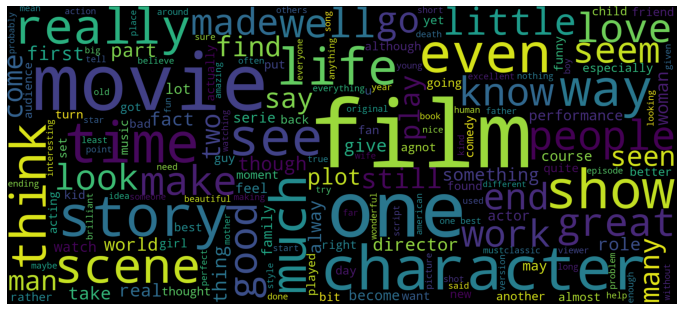

In [25]:
#WordCloud - Positive Review 
wc=WordCloud(width=1800,height=800,background_color='black',
            min_font_size=20,
            max_font_size=250,stopwords=STOPWORDS)
wc.generate(''.join(df[df['sentiment']=='positive']['review']))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

### WordCloud - Negative Reviews

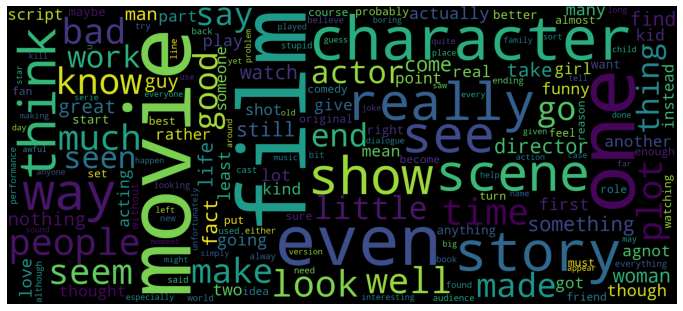

In [26]:
#WordCloud - Negative Review
wc=WordCloud(width=1800,height=800,background_color='black',
            min_font_size=20,
            max_font_size=250,stopwords=STOPWORDS)
wc.generate(''.join(df[df['sentiment']=='negative']['review']))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Positive Corpus

In [27]:
#create Positive corpus
postive_corpus=[]
for sen in df[df['sentiment']=='positive']['review']:
    words=sen.split()
    for w in words:
        postive_corpus.append(w)

In [28]:
from collections import Counter
c=Counter(postive_corpus)
c.most_common(25)

[('not', 61299),
 ('film', 48057),
 ('movie', 43273),
 ('one', 27028),
 ('like', 17564),
 ('time', 15252),
 ('good', 14462),
 ('story', 13684),
 ('character', 13640),
 ('great', 12707),
 ('see', 12517),
 ('well', 11163),
 ('get', 11048),
 ('make', 10943),
 ('really', 10661),
 ('also', 10558),
 ('scene', 9729),
 ('even', 9424),
 ('show', 9407),
 ('life', 9190),
 ('much', 9008),
 ('love', 8919),
 ('first', 8857),
 ('people', 8655),
 ('way', 8545)]

### Negative Corpus

In [29]:
#create Negative corpus
negative_corpus=[]
for sen in df[df['sentiment']=='negative']['review']:
    words=sen.split()
    for w in words:
        negative_corpus.append(w)

In [30]:
c1=Counter(negative_corpus)
c1.most_common(25)

[('not', 77953),
 ('movie', 55780),
 ('film', 41704),
 ('one', 25594),
 ('like', 22075),
 ('even', 14891),
 ('time', 14145),
 ('good', 14130),
 ('bad', 14012),
 ('character', 13866),
 ('get', 13207),
 ('make', 12482),
 ('really', 12148),
 ('scene', 10973),
 ('see', 10860),
 ('story', 10535),
 ('much', 9797),
 ('people', 9258),
 ('thing', 9208),
 ('made', 8323),
 ('plot', 8067),
 ('way', 7962),
 ('first', 7931),
 ('acting', 7781),
 ('well', 7628)]

In [31]:
df.iloc[0]['review']

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust not show fnott hearted timid show pull punch regard drug sex violence hardcore classic use called oz nickname given oswald maximum security state penitentary focus mnotly emerald city experimental section prison cell glass front face inwards privacy not high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement not far say mnot appeal show due fact go show not dare forget pretty picture pnotted mnotstream audience forget charm forget romance oz not mess around first episode ever saw struck nasty surreal not say ready watched developed taste oz got accustomed high level graphic violence not violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watchin

In [32]:
'''
#remove some positive words from negative review
for i,v in enumerate(df['sentiment']):
    if v=='negative':
        sent=df.iloc[i]['review']
        sent=sent.replace('good','never not good')
        sent=sent.replace('like','not like')
        sent=sent.replace('great','no not great')
        sent=sent.replace('well','not well')
        df.at[i, 'review']=sent'''

"\n#remove some positive words from negative review\nfor i,v in enumerate(df['sentiment']):\n    if v=='negative':\n        sent=df.iloc[i]['review']\n        sent=sent.replace('good','never not good')\n        sent=sent.replace('like','not like')\n        sent=sent.replace('great','no not great')\n        sent=sent.replace('well','not well')\n        df.at[i, 'review']=sent"

In [33]:
#make correction in negative review & remove high frequently occurace of words
for i,v in enumerate(df['sentiment']):
    if v=='negative':
        sent=df.iloc[i]['review']
        sent=re.sub(r' one ',' ',sent)
        sent = re.sub(r" movie ",' ',sent)
        sent = re.sub(r" film ",' ',sent)
        sent=re.sub(r' good ',' never not good ',sent)
        sent=re.sub(r' like ',' not not like ',sent)
        sent=re.sub(r' great ',' not not great ',sent)
        sent=re.sub(r' well ',' not not well ',sent)
        sent = re.sub(r"   "," ",sent)
        df.at[i, 'review']=sent

In [34]:
#make correction in positive review & remove high frequently occurace of words
for i,v in enumerate(df['sentiment']):
    if v=='positive':
        sent=df.iloc[i]['review']
        sent=re.sub(r' not ',' ',sent)
        sent = re.sub(r" movie ",' ',sent)
        sent = re.sub(r" film ",' ',sent)
        sent=re.sub(r' one ',' ',sent)
        sent=re.sub(r' bad ',' not bad ',sent)
        sent=re.sub(r' worst ',' not worst ',sent)
        sent = re.sub(r"  "," ",sent)
        df.at[i, 'review']=sent

In [35]:
df

,review,sentiment,num_words,num_words_clean
0,one reviewer mentioned watching oz episode hoo...,positive,307,165
1,wonderful little production filming technique ...,positive,158,83
2,thought wonderful way spend time hot summer we...,positive,165,82
3,basically family little boy jake think zombie ...,negative,135,60
4,petter mattei love time money visually stunnin...,positive,225,120
...,...,...,...,...
49577,thought right good job creative original first...,positive,197,82
49578,bad plot bad dialogue bad acting idiotic direc...,negative,108,52
49579,catholic taught parochial elementary school nu...,negative,232,114
49580,going disagree previous comment side maltin se...,negative,217,112


### Label Encoding of Target Feature

In [36]:
#Encode Target Categ
df['sentiment']=df['sentiment'].map({'positive':1,'negative':0})

In [37]:
#sen_len=[len(word_tokenize(sent)) for sent in df['review']]
#df['sen_len']=sen_len

In [38]:
#max len of words
df['num_words_clean'].max()

1401

In [39]:
df.describe()

,sentiment,num_words,num_words_clean
count,49582.000000,49582.000000,49582.000000
mean,0.501876,231.825239,114.572446
std,0.500002,171.880309,86.163390
min,0.000000,4.000000,3.000000
25%,0.000000,127.000000,62.000000
50%,1.000000,174.000000,85.000000
75%,1.000000,281.000000,139.000000
max,1.000000,2482.000000,1401.000000


In [40]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:green;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Data Preprocessing</b></h3>
</div>

### Input & Output 

In [41]:
#Input & Output 
#X= df.drop(columns=['sentiment','num_words','num_words_clean'],axis=1)
X=df['review']
Y=df['sentiment']

In [42]:
X

0        one reviewer mentioned watching oz episode hoo...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stunnin...
                               ...                        
49577    thought right good job creative original first...
49578    bad plot bad dialogue bad acting idiotic direc...
49579    catholic taught parochial elementary school nu...
49580    going disagree previous comment side maltin se...
49581    one expects star trek high art fan expect neve...
Name: review, Length: 49582, dtype: object

In [43]:
Y

0        1
1        1
2        1
3        0
4        1
        ..
49577    1
49578    0
49579    0
49580    0
49581    0
Name: sentiment, Length: 49582, dtype: int64

In [44]:
#Entire Corpus
corpus=[]
for sen in df['review']:
    corpus.append(sen)

In [45]:
corpus[:3]

['one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show fnott hearted timid show pull punch regard drug sex violence hardcore classic use called oz nickname given oswald maximum security state penitentary focus mnotly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement far say mnot appeal show due fact go show dare forget pretty picture pnotted mnotstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable

### Train-Test split (80/20)

In [46]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [47]:
X_train

7169     altered specie start friday night los angeles ...
529      not sure decides category fit not horror story...
47174    saw league gentleman apocalypse special screen...
48408    three stooge feature length western perhaps ro...
36506    prey interesting history unless remember ad ne...
                               ...                        
5520     throughout watching end day got sense maker pe...
35814    gay counterpart gone wind given epic lenght in...
20463    happens ivan terrible part ii entry worst book...
18638    not seen age figured comment anyway mostly mem...
35683    ingenious enough plausible still lot fun pure ...
Name: review, Length: 39665, dtype: object

In [48]:
X_train.shape,X_test.shape

((39665,), (9917,))

In [49]:
#Min length of to cover 95% population or records
np.quantile(df['num_words_clean'],0.95)

295.0

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:green;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Model Building</b></h3>
</div>

## Model-1

### Multinomial NB

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### 1- CountVectorizer

In [51]:
#CountVectorizer
cv=CountVectorizer(max_features=10000,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(X_train)
#transformed test reviews
cv_test_reviews=cv.transform(X_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (39665, 10000)
BOW_cv_test: (9917, 10000)


### 2- TfidfVectorizer

In [52]:
#TfidfVectorizer
tv=TfidfVectorizer(max_features=10000,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(X_train)
#transformed test reviews
tv_test_reviews=tv.transform(X_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (39665, 10000)
Tfidf_test: (9917, 10000)


### Train model

In [53]:
#training the model with CountVectorizer features
mnb=MultinomialNB()
#fitting the nb for bag of words
mnb_bow=mnb.fit(cv_train_reviews,Y_train)
print(mnb_bow)

MultinomialNB()


In [54]:
#training the model with TfidfVectorizer features
#fitting the nb for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,Y_train)
print(mnb_tfidf)

MultinomialNB()


In [55]:
#Predicting the model for bag of words or CountVectorizer
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

### Model Evaluation 

In [56]:
#Model Evaluation
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(Y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(Y_test,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.9631945144701018
mnb_tfidf_score : 0.9556317434708077


In [57]:
mnb_bow_report = classification_report(Y_test,mnb_bow_predict,target_names = ['0','1'])
print(mnb_bow_report)
cm_cv = confusion_matrix(Y_test,mnb_bow_predict)
cm_cv

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4935
           1       0.96      0.96      0.96      4982

    accuracy                           0.96      9917
   macro avg       0.96      0.96      0.96      9917
weighted avg       0.96      0.96      0.96      9917



array([[4753,  182],
       [ 183, 4799]])

In [58]:
mnb_tfidf_report = classification_report(Y_test,mnb_tfidf_predict,target_names = ['0','1'])
print(mnb_tfidf_report)
cm_tv = confusion_matrix(Y_test,mnb_tfidf_predict)
cm_tv

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      4935
           1       0.94      0.97      0.96      4982

    accuracy                           0.96      9917
   macro avg       0.96      0.96      0.96      9917
weighted avg       0.96      0.96      0.96      9917



array([[4653,  282],
       [ 158, 4824]])

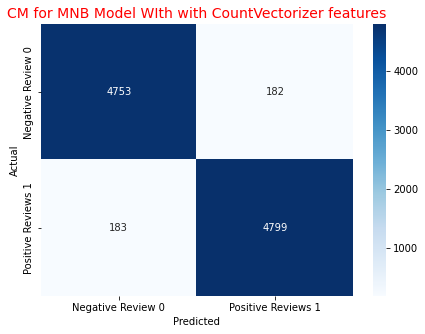

In [59]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='',xticklabels=["Negative Review 0","Positive Reviews 1"],yticklabels=["Negative Review 0","Positive Reviews 1"])

plt.title("CM for MNB Model WIth with CountVectorizer features",color='red',size=14)
plt.show()

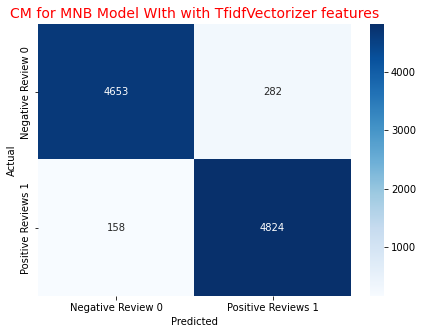

In [60]:
cm_tv = pd.DataFrame(cm_tv, index=[0,1], columns=[0,1])
cm_tv.index.name = 'Actual'
cm_tv.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sns.heatmap(cm_tv,cmap= "Blues",annot = True, fmt='',xticklabels=["Negative Review 0","Positive Reviews 1"]
            ,yticklabels=["Negative Review 0","Positive Reviews 1"])
plt.title("CM for MNB Model WIth with TfidfVectorizer features",color='red',size=14)
plt.show()

### Accuracy of MNB by BOW and TFIDF 

In [61]:
df_results_mnb=pd.DataFrame({"MNB BOW score":[mnb_bow_score],"MNB tfidf score":[mnb_tfidf_score]})
df_results_mnb=df_results_mnb.round(4)
df_results_mnb=df_results_mnb*100
df_results_mnb

,MNB BOW score,MNB tfidf score
0,96.32,95.56


## II - Deep Learning NN

## Model-2

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_features=10000
tok = text.Tokenizer(num_words=max_features)
tok.fit_on_texts(X_train)

In [63]:
len(tok.index_word)

81911

In [64]:
dict(tok.index_word)

{1: 'not',
 2: 'like',
 3: 'time',
 4: 'good',
 5: 'character',
 6: 'even',
 7: 'get',
 8: 'story',
 9: 'see',
 10: 'make',
 11: 'really',
 12: 'scene',
 13: 'much',
 14: 'well',
 15: 'people',
 16: 'great',
 17: 'bad',
 18: 'also',
 19: 'first',
 20: 'show',
 21: 'way',
 22: 'thing',
 23: 'made',
 24: 'think',
 25: 'life',
 26: 'go',
 27: 'know',
 28: 'never',
 29: 'watch',
 30: 'love',
 31: 'many',
 32: 'two',
 33: 'actor',
 34: 'seen',
 35: 'say',
 36: 'plot',
 37: 'look',
 38: 'end',
 39: 'acting',
 40: 'best',
 41: 'little',
 42: 'year',
 43: 'ever',
 44: 'better',
 45: 'man',
 46: 'come',
 47: 'take',
 48: 'still',
 49: 'work',
 50: 'part',
 51: 'find',
 52: 'something',
 53: 'give',
 54: 'lot',
 55: 'want',
 56: 'back',
 57: 'guy',
 58: 'real',
 59: 'director',
 60: 'watching',
 61: 'performance',
 62: 'woman',
 63: 'play',
 64: 'funny',
 65: 'though',
 66: 'actually',
 67: 'another',
 68: 'nothing',
 69: 'going',
 70: 'role',
 71: 'u',
 72: 'new',
 73: 'old',
 74: 'every',
 75:

In [65]:
tok_X_train = tok.texts_to_sequences(X_train)
tok_X_test = tok.texts_to_sequences(X_test)

In [66]:
len(tok_X_train)

39665

In [67]:
tok_X_test[25]

[1607,
 136,
 1514,
 2052,
 19,
 131,
 5166,
 1395,
 500,
 6,
 65,
 4,
 500,
 146,
 532,
 781,
 2052,
 101,
 317,
 136,
 4507,
 1545,
 269,
 5258,
 51,
 281,
 5,
 136,
 6552,
 391,
 3648,
 5166,
 1395,
 500,
 3318,
 3971,
 131,
 50,
 63,
 2,
 781,
 1684,
 2,
 5931,
 1122,
 88,
 80,
 88,
 203,
 781,
 194,
 129,
 54,
 146,
 544]

In [68]:
from keras_preprocessing.sequence import pad_sequences
max_len=295
padd_X_train = pad_sequences(tok_X_train, maxlen=max_len)
padd_X_test = pad_sequences(tok_X_test, maxlen=max_len)

In [69]:
padd_X_train[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [70]:
#create model 

In [71]:
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,Dropout

In [72]:
voc_size=10000
embedding_vec_features=50
model = Sequential()

#Embedding Layer
model.add(Embedding(input_dim=voc_size,output_dim=50,input_length=295))

#LSTM
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25,activation='tanh'))
model.add(LSTM(units=64 , recurrent_dropout = 0.15, dropout = 0.15, activation='tanh'))
model.add(Dense(units=32 , activation = 'relu'))
model.add(Dense(units=16 , activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 295, 50)           500000    
                                                                 
 lstm (LSTM)                 (None, 295, 128)          91648     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 643,681
Trainable params: 643,681
Non-trai

In [74]:
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
cb=EarlyStopping(
    monitor="val_accuracy",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=2,
    verbose=1,
    mode="auto", #minimize loss  #maximize accuracy
    baseline=None,
    restore_best_weights=False
)

In [75]:
train_model=model.fit(padd_X_train, Y_train, batch_size = 500 , validation_data = (padd_X_test,Y_test) , epochs = 5 , callbacks = [cb])

Epoch 1/5
80/80 [==============================] - 677s 8s/step - loss: 0.3065 - accuracy: 0.8743 - val_loss: 0.1060 - val_accuracy: 0.9597
Epoch 2/5
80/80 [==============================] - 670s 8s/step - loss: 0.0663 - accuracy: 0.9778 - val_loss: 0.1003 - val_accuracy: 0.9661
Epoch 3/5
80/80 [==============================] - 661s 8s/step - loss: 0.0560 - accuracy: 0.9811 - val_loss: 0.1416 - val_accuracy: 0.9467
Epoch 4/5
80/80 [==============================] - 654s 8s/step - loss: 0.0451 - accuracy: 0.9850 - val_loss: 0.0771 - val_accuracy: 0.9730
Epoch 5/5
80/80 [==============================] - 638s 8s/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0984 - val_accuracy: 0.9708


In [76]:
len(Y_train)

39665

In [77]:
len(padd_X_train)

39665

### Model Evaluation LSTM

In [78]:
train=model.evaluate(padd_X_train, Y_train)

1240/1240 [==============================] - 183s 148ms/step - loss: 0.0135 - accuracy: 0.9957


In [79]:
print("Training accuracy :",train[1])
print("Training loss :",train[0])

Training accuracy : 0.9957141280174255
Training loss : 0.013511814177036285


In [80]:
test=model.evaluate(padd_X_test, Y_test)

310/310 [==============================] - 45s 144ms/step - loss: 0.0984 - accuracy: 0.9708


In [81]:
print("Testing accuracy :",test[1])
print("Testing loss :",test[0])

Testing accuracy : 0.9707573056221008
Testing loss : 0.0983775407075882


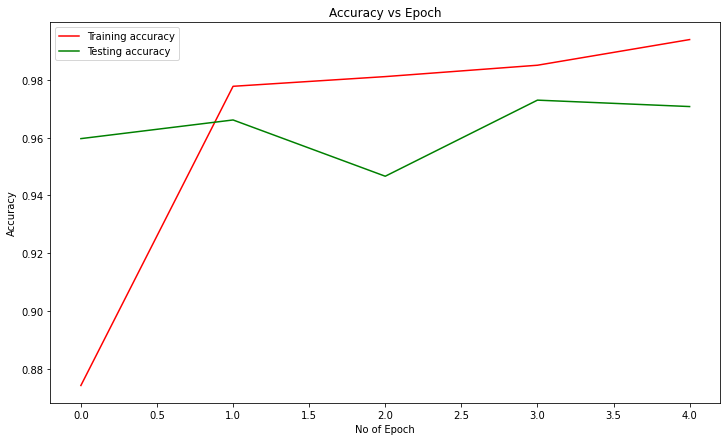

In [82]:
plt.figure(figsize=(12,7))
plt.plot(train_model.history['accuracy'],label='Training accuracy',color='red')
plt.plot(train_model.history['val_accuracy'],label='Testing accuracy',color='green')
plt.legend()
plt.xlabel('No of Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Epoch")
plt.show()

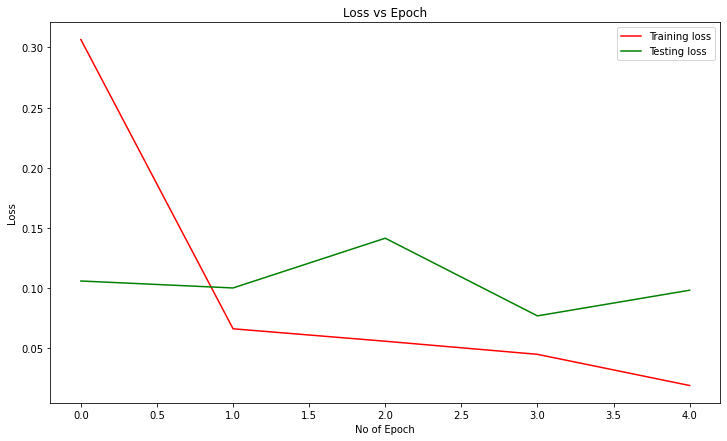

In [83]:
plt.figure(figsize=(12,7))
plt.plot(train_model.history['loss'],label='Training loss',color='red')
plt.plot(train_model.history['val_loss'],label='Testing loss',color='green')
plt.legend()
plt.xlabel('No of Epoch')
plt.ylabel('Loss')
plt.title("Loss vs Epoch")
plt.show()

In [84]:
y_pred_prob=model.predict(padd_X_test)
y_pred=np.where(y_pred_prob>0.5,1,0)

In [85]:
y_pre = y_pred.flatten()

In [86]:
y_pre

array([1, 1, 0, ..., 0, 1, 1])

In [87]:
result_df1=pd.DataFrame({"Test_Review":X_test,"Prob":y_pred_prob.flatten(),"Predict_Sentiment":y_pred.flatten(),"Actual_Sentiment":Y_test})

In [88]:
result_df1

,Test_Review,Prob,Predict_Sentiment,Actual_Sentiment
2439,anyone moderate sensibility moderate feeling h...,0.999893,1,1
13375,reunion team great episode justice hesitation ...,0.999990,1,1
28402,proof not everything tarantino touch turn gold...,0.002016,0,0
49463,watched last night tv hbo admit tension unsurp...,0.999985,1,1
30786,tried not not like slasher not not like try en...,0.000281,0,0
...,...,...,...,...
2464,slick romanticizing sexual exploitation neworl...,0.001471,0,0
30925,not good still like cat clovis gold jar well p...,0.999968,1,1
48248,kid always used babysat always used rent see c...,0.000598,0,0
28840,victor mature barely civilized mostly control ...,0.966231,1,1


In [89]:
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4935
           1       0.98      0.96      0.97      4982

    accuracy                           0.97      9917
   macro avg       0.97      0.97      0.97      9917
weighted avg       0.97      0.97      0.97      9917

[[4844   91]
 [ 199 4783]]


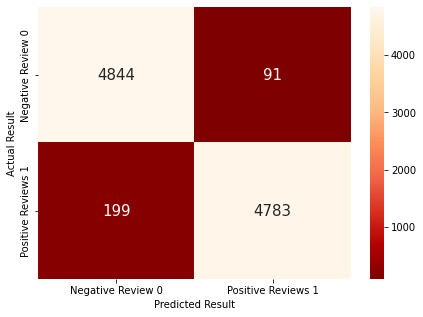

In [90]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,cmap="OrRd_r",
            fmt="d",cbar=True,
            annot_kws={"fontsize":15},
            xticklabels=["Negative Review 0","Positive Reviews 1"],yticklabels=["Negative Review 0","Positive Reviews 1"])
plt.ylabel("Actual Result")
plt.xlabel("Predicted Result")
plt.show()

### Model Deployment

In [109]:
#save model architechure and weights in single file
model.save("model.h5")

In [107]:
import pickle
#save tokenize object
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [110]:
from tensorflow.keras.models import load_model

In [111]:
model = load_model('model.h5')

In [112]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 295, 50)           500000    
                                                                 
 lstm (LSTM)                 (None, 295, 128)          91648     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 643,681
Trainable params: 643,681
Non-trai

In [ ]:
y_prob=model.predict(padd_X_test)

In [150]:
text="bad "

In [151]:
text=remove_urls(text)
text=remove_emails(text)
text=remove_numbers(text)
text=remove_html(text)
text= decontraction(text)
text=clean_text(text)
text

'bad'

In [152]:
tok_text = tok.texts_to_sequences([text])

In [153]:
tok_text

[[17]]

In [154]:
padd_tok_text = sequence.pad_sequences(tok_text, maxlen=max_len)

In [155]:
padd_tok_text

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

In [156]:
mdl.predict(padd_tok_text)

array([[0.51938194]], dtype=float32)